In [2]:
from dtcs.bulk_crn import *
from dtcs.experiments.xps_io import *
from dtcs.experiments.solution_system import *
from dtcs.spec.crn import *
from dtcs.experiments.simulate import simulate
from dtcs.experiments.xps_io import read_exp
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid

In [1]:
sm = SpeciesManager()

v_3n_nh2 = sm.sp('v_3n_nh2', Orbital('1s', 535.0))
v_h2 = sm.sp('v_h2', Orbital('1s', 532.2))
v_3n_nh2_2h = sm.sp('v_3n_nh2_2h', Orbital('1s', 530.9))
v_3n_nh3_h = sm.sp('v_3n_nh3_h', Orbital('1s', 530.0))
v_3n_h = sm.sp('v_3n_h', Orbital('1s', 530.0))
v_nh3 = sm.sp('v_nh3', Orbital('1s', 530.0))
v_2n_nh = sm.sp('v_2n_nh', Orbital('1s', 530.0))
v_2n_nh_2h = sm.sp('v_2n_nh_2h', Orbital('1s', 530.0))
v_2n_nh2_h = sm.sp('v_2n_nh2_h', Orbital('1s', 530.0))
v_2n_nh3 = sm.sp('v_2n_nh3', Orbital('1s', 530.0))
v_2n = sm.sp('v_2n', Orbital('1s', 530.0))
v_n2 = sm.sp('v_n2', Orbital('1s', 530.0))
v_2n_n2 = sm.sp('v_2n_n2', Orbital('1s', 530.0))
v_4n = sm.sp('v_4n', Orbital('1s', 530.0))
v_3n_nh_h = sm.sp('v_3nh_h', Orbital('1s', 530.0))
v_3n_nh2 = sm.sp('v_3nh2', Orbital('1s', 530.0))
v_2n_2h = sm.sp('v_2n_2h', Orbital('1s', 530.0))


constants = [7.67e8, 1.41e13, 2.6e6, 2.48e4, 1.03e7, 6.66e2, 1.84e6, 7.2e9, 7.67e8, 3.04e9, 1.6e11, 1.1e6, 1.14e0, 7.79e5,
            3.91e5, 3.14e3, 8.69e6, 4.1e7, 7.2e9, 1.35, 2.77e5, 6.45e8, 1.41e13, 7.67e8, 7.67e8, 1.48e4]
constants = [10e-9 * c for c in constants]
multipliers = [1]

main = XPSInitializationData(
                'High P, High T',
                0,
                0,
                constants=constants
            )

init_data = [main]

def rsys_generator(scaled):
    rsys = RxnSystem(
        RevRxn(v_3n_nh2 + v_h2, v_3n_nh2_2h, scaled[0], scaled[1]),
        RevRxn(v_3n_nh2_2h, v_3n_nh3_h, scaled[2], scaled[3]),
        RevRxn(v_3n_nh3_h, v_3n_h + v_nh3, scaled[4], scaled[5]),
        RevRxn(v_3n_h, v_2n_nh, scaled[6], scaled[7]),
        RevRxn(v_2n_nh + v_h2, v_2n_nh_2h, scaled[8], scaled[9]),
        RevRxn(v_2n_nh_2h, v_2n_nh2_h, scaled[10], scaled[11]),
        RevRxn(v_2n_nh2_h, v_2n_nh3, scaled[12], scaled[13]),
        RevRxn(v_2n_nh3, v_2n + v_nh3, scaled[14], scaled[15]),
        RevRxn(v_2n + v_n2, v_2n_n2, scaled[16], scaled[17]),
        RevRxn(v_2n_n2, v_4n, scaled[18], scaled[19]),
        RevRxn(v_4n + v_h2, v_3n_nh_h, scaled[20], scaled[21]),
        RevRxn(v_3n_nh_h, v_3n_nh2, scaled[22], scaled[23]),
        RevRxn(v_2n + v_h2, v_2n_2h, scaled[24], scaled[25]),

        Conc(v_n2, 5),
        Conc(v_h2, 15),
        Conc(v_3n_nh2, 1), # 2-20 range
        sm
    )
    return rsys

NameError: name 'SpeciesManager' is not defined

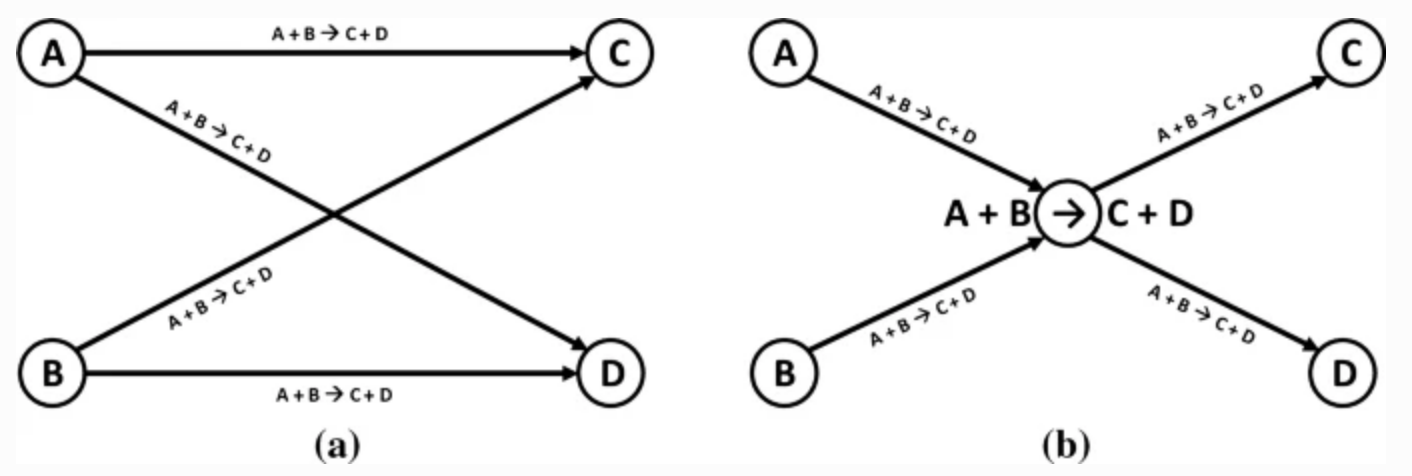

https://link.springer.com/article/10.1007%2Fs11090-021-10152-z

https://pubs.acs.org/doi/full/10.1021/acs.energyfuels.7b01202

https://www.nature.com/articles/s41467-020-19267-x <-- this is a cool ML paper

In [3]:
constants = [1]*26
constants[1] = 10
constants[2] = 3
#constants = [7.67e8, 1.41e13, 2.6e6, 2.48e4, 1.03e7, 6.66e2, 1.84e6, 7.2e9, 7.67e8, 3.04e9, 1.6e11, 1.1e6, 1.14e0, 7.79e5,
            #3.91e5, 3.14e3, 8.69e6, 4.1e7, 7.2e9, 1.35, 2.77e5, 6.45e8, 1.41e13, 7.67e8, 7.67e8, 1.48e4]
rsys = rsys_generator(constants)
# repr(rsys)
# Question: How to represent the reaction coefficients? [x]2 labeling on edges --> reaction network series
# Question: What input format type: (input rxn, input source + dest etc.) --> both, but do eq first

In [4]:
rsys.plot()

In [5]:

rsys.text()

'1 unit of v_3nh2 and 1 unit of v_h2 are converted to 1 unit of v_3n_nh2_2h at a rate of 1. 1 unit of v_3n_nh2_2h is converted to 1 unit of v_3n_nh3_h at a rate of 3. 1 unit of v_3n_nh3_h is converted to 1 unit of v_3n_h and 1 unit of v_nh3 at a rate of 1. 1 unit of v_3n_h is converted to 1 unit of v_2n_nh at a rate of 1. 1 unit of v_2n_nh and 1 unit of v_h2 are converted to 1 unit of v_2n_nh_2h at a rate of 1. 1 unit of v_2n_nh_2h is converted to 1 unit of v_2n_nh2_h at a rate of 1. 1 unit of v_2n_nh2_h is converted to 1 unit of v_2n_nh3 at a rate of 1. 1 unit of v_2n_nh3 is converted to 1 unit of v_2n and 1 unit of v_nh3 at a rate of 1. 1 unit of v_2n and 1 unit of v_n2 are converted to 1 unit of v_2n_n2 at a rate of 1. 1 unit of v_2n_n2 is converted to 1 unit of v_4n at a rate of 1. 1 unit of v_4n and 1 unit of v_h2 are converted to 1 unit of v_3nh_h at a rate of 1. 1 unit of v_3nh_h is converted to 1 unit of v_3nh2 at a rate of 1. 1 unit of v_2n and 1 unit of v_h2 are converted to 

In [5]:
sm = SpeciesManager()
v = sm.sp('virus')
h = sm.sp('healthy')
inf = sm.sp('infected')

rsys = RxnSystem(
    sm,
    Rxn(h + v, inf , 2e-7), 
    Rxn(inf, None, 0.5),
    Rxn(h, None, 0.2),
    Rxn(v, None, 5),
    Rxn(None, h, 1e5),
    Rxn(inf, v + inf, 100),
    
    Conc(h, 1000000),
    Conc(v, 100),
)

In [6]:
rsys.plot()

In [3]:
sm = SpeciesManager()

y1 = sm.sp('H2Og', Orbital('1s', 535.0))
x2 = sm.sp('H2O', Orbital('1s', 532.2))
x3 = sm.sp('OH', Orbital('1s', 530.9))
x4 = sm.sp('O', Orbital('1s', 530.0))
x53 = sm.sp('OH.H2O_hb', Orbital('1s', 531.6))
x54 = sm.sp('O.H2O_hb', Orbital('1s', 531.6))
x6 = sm.sp('multiH2O', Orbital('1s', 533.2))
x7 = sm.sp('O2g', Orbital('1s', 535.0))

rsys = RxnSystem(
    Rxn(x4 + y1, x54, 3.207654),
    Rxn(x3 + y1, x53, 1.363342),
    Rxn(x54, x3 + x3, 6.220646),
    Rxn(x3 + x3, x54, 0.160755),
    Rxn(x53, x2 + x3, 0.299507),
    Rxn(x54, x2 + x4, 0.167130),
    Rxn(x2, y1, 1.939313),
    Rxn(y1, x2, 0.515646),
    Rxn(x53, y1 + x3, 0.733491),
    Rxn(x54, x4 + y1, 0.311754),
    Rxn(x53 + y1, x6, 1.038423),
    Rxn(x6, x53 + y1, 0.962999),
    Rxn(x4 + x4, x7, 0.002342),
    Rxn(x7, x4 + x4, 426.922895),
    Conc(y1,1),
    Conc(x4,0.25),
    sm
)
rsys.plot()